In [1]:
from pathlib import Path
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from metpy.plots import USCOUNTIES
import pandas as pd

%matplotlib inline

Unable to open EPSG support file gcs.csv.  Try setting the GDAL_DATA environment variable to point to the directory containing EPSG csv files.


In [2]:
df_hail = pd.read_csv('https://www.spc.noaa.gov/climo/reports/yesterday_hail.csv')
df_wind = pd.read_csv('https://www.spc.noaa.gov/climo/reports/yesterday_wind.csv')
df_tor = pd.read_csv('https://www.spc.noaa.gov/climo/reports/yesterday_torn.csv')

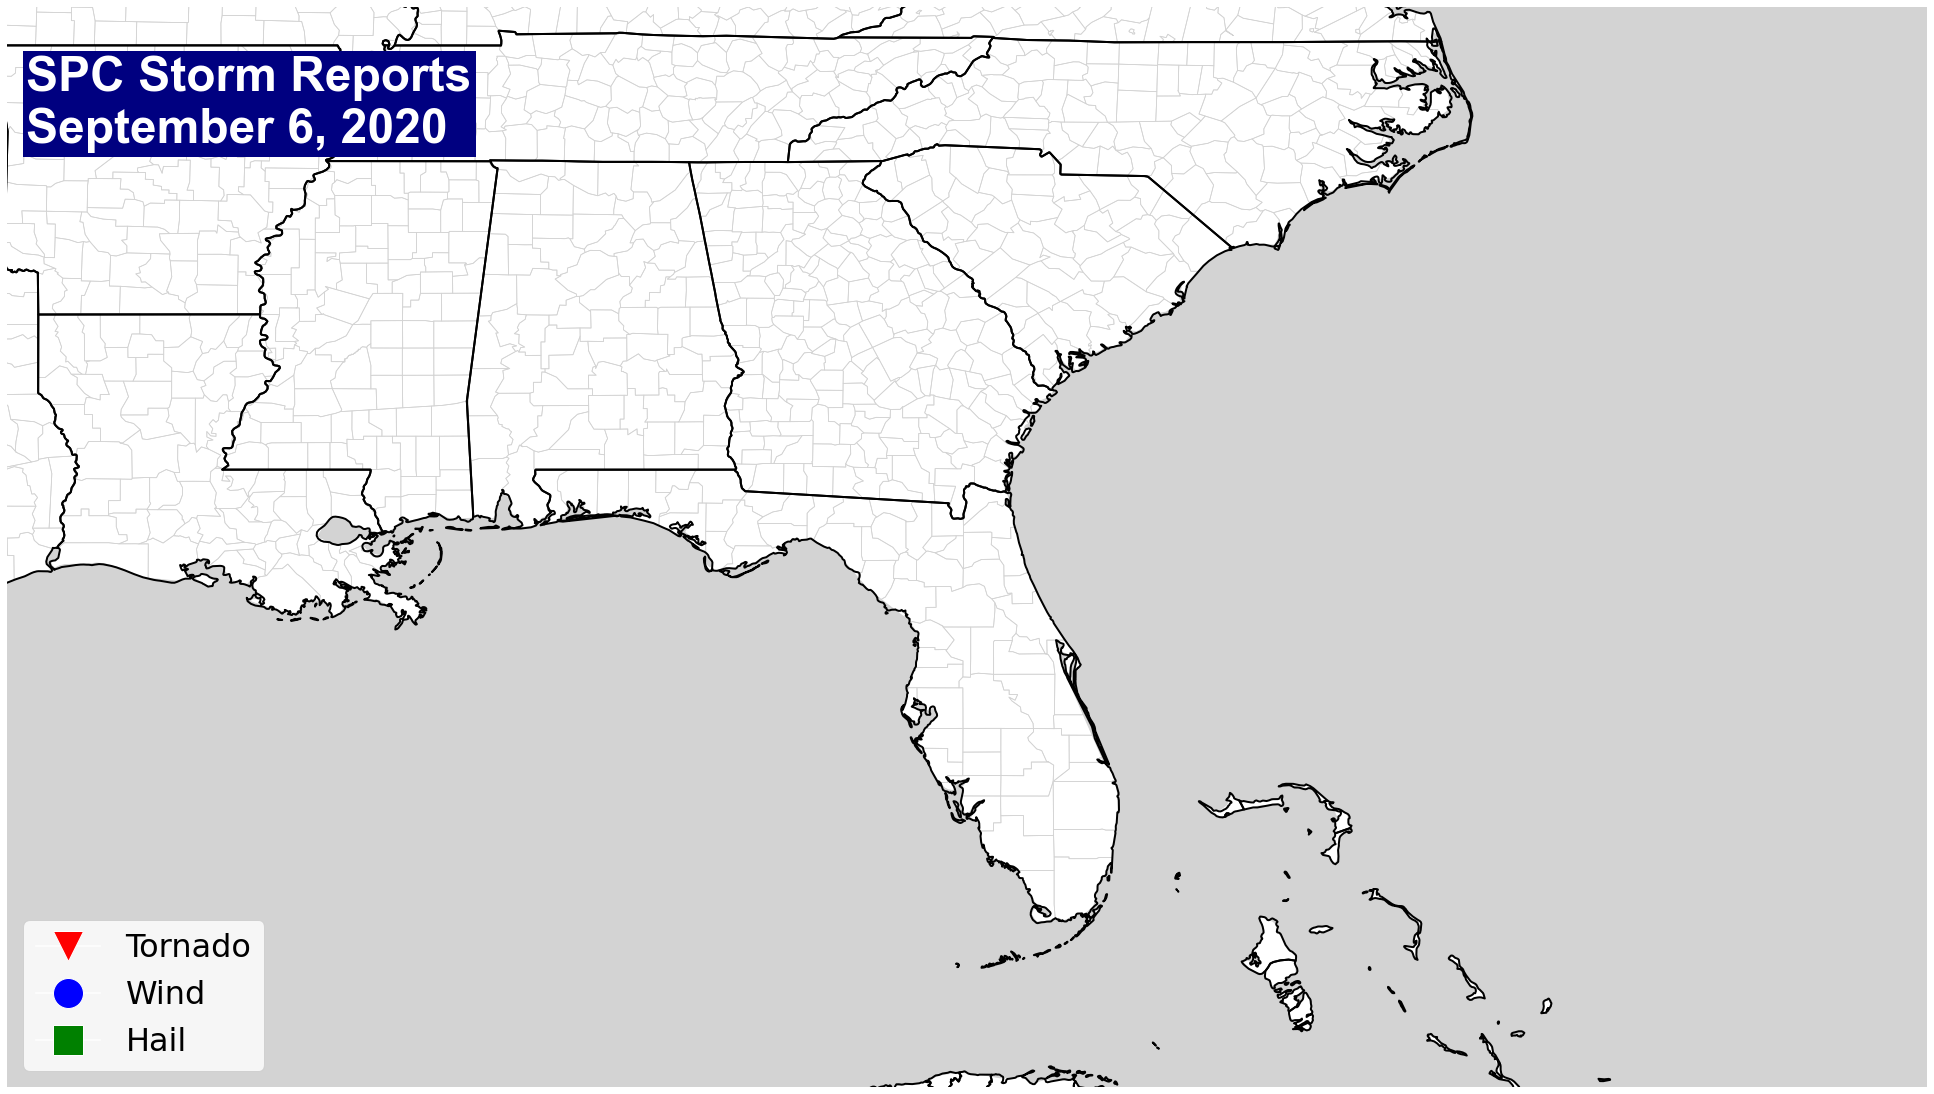

In [3]:
fig = plt.figure(figsize=(1920/72, 1080/72))
ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.PlateCarree())

ax.set_title('SPC Storm Reports\nSeptember 6, 2020', loc='left', 
             ha='left', va='top', fontsize=48, color='white', 
             fontweight='bold', fontname='Arial', y=0.95, x=0.01,
             bbox=dict(facecolor='navy', alpha=1.0, edgecolor='none'))

ax.add_feature(cfeature.OCEAN.with_scale('50m'), color='lightgray')
ax.add_feature(USCOUNTIES.with_scale('20m'), edgecolor='lightgray', linewidth=0.75)
ax.add_feature(cfeature.STATES.with_scale('10m'), linewidth=2.0)
ax.set_adjustable('datalim')
ax.outline_patch.set_visible(False)

ax.set_extent([-89, -75, 23, 37])

ax.scatter(df_hail.Lon, df_hail.Lat, transform=ccrs.PlateCarree(), 
           c='green', s=(df_hail.Size/10)**2, zorder=2, marker='s')
ax.scatter(df_wind.Lon, df_wind.Lat, transform=ccrs.PlateCarree(), 
           c='blue', s=200, zorder=2, marker='o')
ax.scatter(df_tor.Lon, df_tor.Lat, transform=ccrs.PlateCarree(), 
           c='red', s=200, zorder=2, marker='v')

legend_elements = [Line2D([0], [0], marker='v', color='w', label='Tornado',
                          markerfacecolor='red', markersize=30),
                   Line2D([0], [0], marker='o', color='w', label='Wind',
                          markerfacecolor='blue', markersize=30),
                   Line2D([0], [0], marker='s', color='w', label='Hail',
                          markerfacecolor='green', markersize=30)]

ax.legend(handles=legend_elements, loc='lower left', fontsize=32)

graphics_dir = Path('.') / '..' / '..' / 'graphics' / 'spc'
plt.savefig(f'{graphics_dir}/storm_reports_yesterday.png', dpi=72)